In [2]:
import urllib, json
def generate_toc(notebook_path, indent_char="&emsp;"):
    is_markdown = lambda it: "markdown" == it["cell_type"]
    is_title = lambda it: it.strip().startswith("#") and it.strip().lstrip("#").lstrip()
    with open(notebook_path, 'r') as in_f:
        nb_json = json.load(in_f)
    for cell in filter(is_markdown, nb_json["cells"]):
        for line in filter(is_title, cell["source"]):
            line = line.strip()
            indent = indent_char * (line.index(" ") - 1)
            title = line.lstrip("#").lstrip()
            url = urllib.parse.quote(title.replace(" ", "-"))
            out_line = f"{indent}[{title}](#{url})<br>\n"
            print(out_line, end="")
            
generate_toc('Martinez_Eva_1_notebook_exploratoire_102022.ipynb')

&emsp;[Import lib](#Import-lib)<br>
&emsp;[Import data csv](#Import-data-csv)<br>
&emsp;[Explore the data](#Explore-the-data)<br>
&emsp;[Data Cleaning](#Data-Cleaning)<br>
&emsp;&emsp;[Select non-residential buildings](#Select-non-residential-buildings)<br>
&emsp;&emsp;[Select meaningful features](#Select-meaningful-features)<br>
&emsp;&emsp;[Address outliers](#Address-outliers)<br>
&emsp;&emsp;[Quantitative Statistics](#Quantitative-Statistics)<br>
&emsp;&emsp;[Qualitative Statistics](#Qualitative-Statistics)<br>
&emsp;&emsp;[New feature creation: porportion of energy used](#New-feature-creation%3A-porportion-of-energy-used)<br>
&emsp;&emsp;[Show and save my cleaned df](#Show-and-save-my-cleaned-df)<br>


&emsp;[Import lib](#Import-lib)<br>
&emsp;[Import data csv](#Import-data-csv)<br>
&emsp;[Explore the data](#Explore-the-data)<br>
&emsp;[Data Cleaning](#Data-Cleaning)<br>
&emsp;&emsp;[Select non-residential buildings](#Select-non-residential-buildings)<br>
&emsp;&emsp;[Select meaningful features](#Select-meaningful-features)<br>
&emsp;&emsp;[Address outliers](#Address-outliers)<br>
&emsp;&emsp;[Quantitative Statistics](#Quantitative-Statistics)<br>
&emsp;&emsp;[Qualitative Statistics](#Qualitative-Statistics)<br>
&emsp;&emsp;[New feature creation: porportion of energy used](#New-feature-creation%3A-porportion-of-energy-used)<br>
&emsp;&emsp;[Show and save my cleaned df](#Show-and-save-my-cleaned-df)<br>

## Import lib

In [4]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.__config__ import show
import scipy.stats as stats
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols


## Import data csv

In [5]:
df = pd.read_csv('/content/df_buldings.csv')

## Explore the data

In [6]:
# Shape and type 
print('df size : ',df.shape)
print('df type :')
df.info(verbose=True)

df size :  (3376, 46)
df type :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   o

In [7]:
# What are the columns ?
print('columns name',df.columns)

columns name Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
  

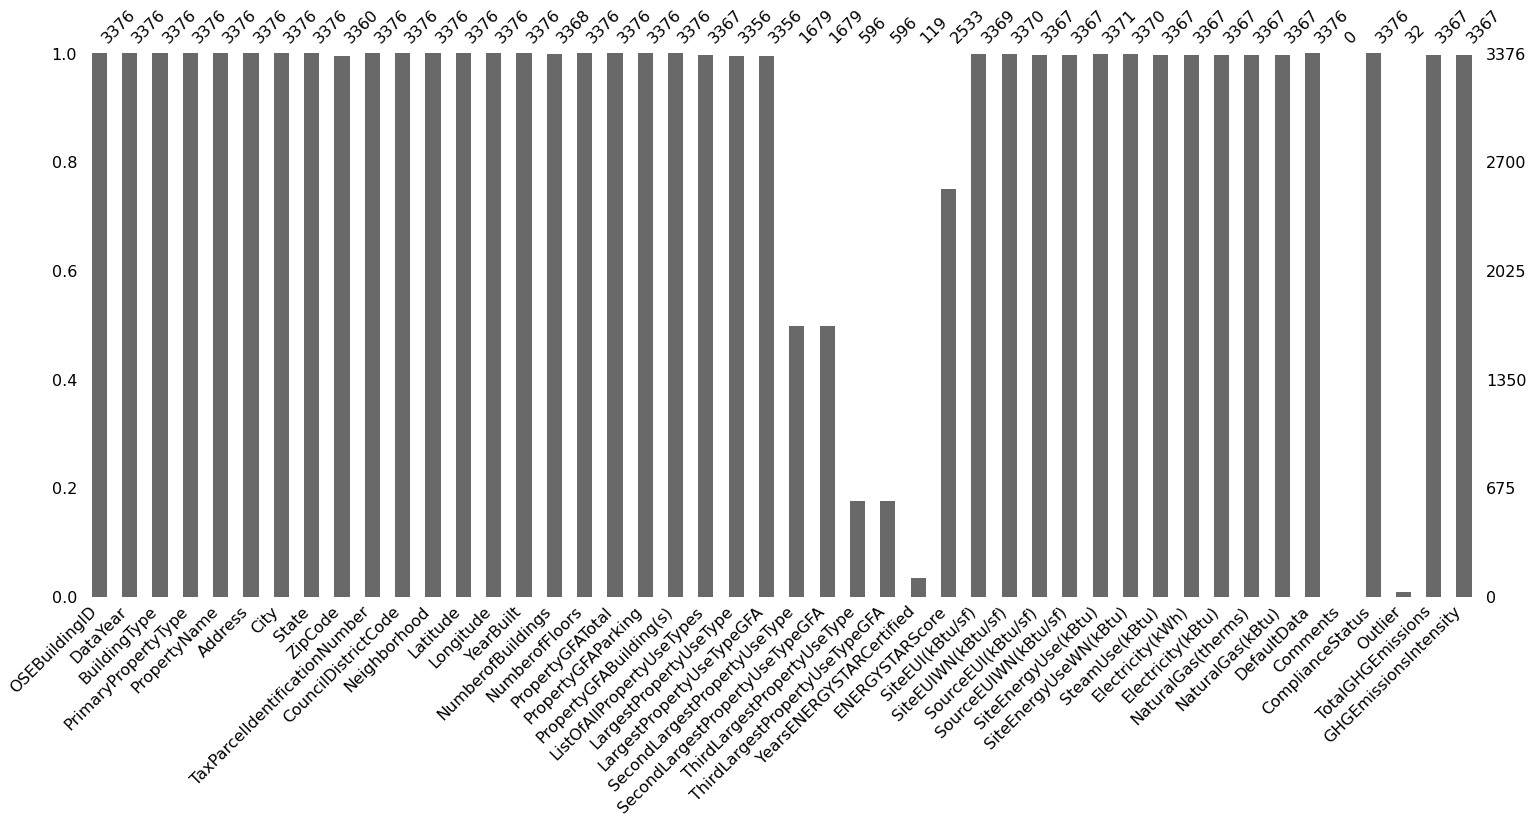

In [8]:
# How is the df filled ? 
%matplotlib inline
msno.bar(df)

## Data Cleaning

### Select non-residential buildings

In [9]:
print('shape all buildings',df.shape)
df_nonresidential = df[df.BuildingType.str.contains('NonResidential')]
print('shape nonresidential buildings', df_nonresidential.shape)

df_nonresidential['PrimaryPropertyType'] = df_nonresidential['PrimaryPropertyType'].astype(str)
df_nonresidential['YearBuilt'] = df_nonresidential['YearBuilt'].astype(str)


shape all buildings (3376, 46)
shape nonresidential buildings (1460, 46)


<ipython-input-9-5fcccdda1940>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonresidential['PrimaryPropertyType'] = df_nonresidential['PrimaryPropertyType'].astype(str)
<ipython-input-9-5fcccdda1940>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonresidential['YearBuilt'] = df_nonresidential['YearBuilt'].astype(str)


### Select meaningful features

In [10]:
df_nonresidential=df_nonresidential[['SiteEnergyUse(kBtu)','TotalGHGEmissions', 'PrimaryPropertyType',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors','PropertyGFABuilding(s)','PropertyGFAParking', 'SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','ENERGYSTARScore']]

print('df with selected features',df_nonresidential.shape)
df_nonresidential.describe()




df with selected features (1460, 14)


,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),PropertyGFAParking,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ENERGYSTARScore
count,1.458000e+03,1458.000000,1460.000000,1460.000000,1458.000000,1460.000000,1.460000e+03,1460.000000,1.458000e+03,1.458000e+03,1.458000e+03,995.000000
mean,7.743262e+06,166.340947,47.616115,-122.333457,1.034294,4.370548,9.878188e+04,14255.386986,4.998068e+05,5.514732e+06,1.681726e+06,63.862312
std,1.909175e+07,586.106337,0.046616,0.023011,0.540904,6.763737,1.688767e+05,44390.587398,5.448602e+06,1.329224e+07,5.646165e+06,28.917564
min,0.000000e+00,-0.800000,47.509590,-122.411820,0.000000,0.000000,3.636000e+03,0.000000,0.000000e+00,-1.154170e+05,0.000000e+00,1.000000
25%,1.201677e+06,18.912500,47.587855,-122.342335,1.000000,1.000000,2.814350e+04,0.000000,0.000000e+00,7.042265e+05,0.000000e+00,44.000000
50%,2.598999e+06,47.055000,47.612420,-122.333195,1.000000,3.000000,4.591200e+04,0.000000,0.000000e+00,1.658950e+06,4.187330e+05,71.000000
75%,6.950048e+06,133.560000,47.648868,-122.322845,1.000000,5.000000,9.383225e+04,0.000000,0.000000e+00,5.076646e+06,1.380787e+06,89.000000
max,2.930908e+08,12307.160000,47.733870,-122.261800,9.000000,99.000000,1.765970e+06,512608.000000,1.349435e+08,2.745325e+08,1.381912e+08,100.000000


### Address outliers

In [11]:
print('Shape before getting rid of outliers',df_nonresidential.shape)
df_nonresidential.describe()

# Get rid of every negative or equal to 0 TotalGHGEmissions
list_TotalGHGEmissions_neg = list(np.where(df_nonresidential['TotalGHGEmissions']<=0))
df_nonresidential = df_nonresidential.drop(df_nonresidential.index[list_TotalGHGEmissions_neg])

# Get rid of every negative or equal to 0 SiteEnergyUse_kBtu
list_SiteEnergyUse_kBtu_neg = list(np.where(df_nonresidential['SiteEnergyUse(kBtu)']<=0))
df_nonresidential = df_nonresidential.drop(df_nonresidential.index[list_SiteEnergyUse_kBtu_neg])

# Get rid of every negative Electricity_kBtu
list_Electricity_kBtu_neg = list(np.where(df_nonresidential['Electricity(kBtu)']<0))
df_nonresidential = df_nonresidential.drop(df_nonresidential.index[list_Electricity_kBtu_neg])

# Get rid of every buildings where NumberofBuildings is negative or equal to 0
list_nb_buildings_0 = list(np.where(df_nonresidential['NumberofBuildings']<= 0))
df_nonresidential = df_nonresidential.drop(df_nonresidential.index[list_nb_buildings_0])

# Get rid of every buildings where the amount of SiteEnergyUse(kBtu) is not the sum of SteamUse(kBtu), Electricity(kBtu) and NaturalGas(kBtu) (we accepted error less than 10 kBtu )
df_nonresidential = df_nonresidential
df_nonresidential['total_count_energyuse'] = df_nonresidential['SteamUse(kBtu)']	+ df_nonresidential['Electricity(kBtu)'] + df_nonresidential['NaturalGas(kBtu)']
df_nonresidential['total_count_energyuse_diff'] = abs(((df_nonresidential['SiteEnergyUse(kBtu)'] - df_nonresidential['total_count_energyuse'])/df_nonresidential['SiteEnergyUse(kBtu)'])*100)

list_building_to_keep=[]
for energy_diff in df_nonresidential['total_count_energyuse_diff']:
  if energy_diff >=10:
    list_building_to_keep.append(0)
  else:
    list_building_to_keep.append(1)

df_nonresidential['tokeepornot'] = list_building_to_keep
df_nonresidential = df_nonresidential.loc[df_nonresidential['tokeepornot']!= 0]
del df_nonresidential['total_count_energyuse']
del df_nonresidential['total_count_energyuse_diff']
del df_nonresidential['tokeepornot']

print('Shape after getting rid of outliers',df_nonresidential.shape)
df_nonresidential.describe()

Shape before getting rid of outliers (1460, 14)
Shape after getting rid of outliers (1402, 14)


/usr/local/lib/python3.8/dist-packages/pandas/core/indexes/base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),PropertyGFAParking,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ENERGYSTARScore
count,1.400000e+03,1400.000000,1402.000000,1402.000000,1400.000000,1402.000000,1.402000e+03,1402.000000,1.400000e+03,1.400000e+03,1.400000e+03,963.000000
mean,7.642920e+06,165.631229,47.616064,-122.333346,1.065000,4.378745,9.730728e+04,14306.088445,5.091458e+05,5.473784e+06,1.660165e+06,63.951194
std,1.922818e+07,594.342406,0.046770,0.023156,0.508038,6.848305,1.642964e+05,44722.058801,5.544840e+06,1.337800e+07,5.688755e+06,28.850837
min,1.680890e+04,0.120000,47.509590,-122.411820,1.000000,0.000000,3.636000e+03,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,1.167316e+06,18.840000,47.587270,-122.342250,1.000000,1.000000,2.807400e+04,0.000000,0.000000e+00,6.883495e+05,0.000000e+00,45.000000
50%,2.563995e+06,46.875000,47.612520,-122.333160,1.000000,3.000000,4.507500e+04,0.000000,0.000000e+00,1.632788e+06,4.176340e+05,71.000000
75%,6.863508e+06,132.907500,47.649048,-122.322660,1.000000,5.000000,9.330275e+04,0.000000,0.000000e+00,5.012304e+06,1.341784e+06,89.000000
max,2.930908e+08,12307.160000,47.733870,-122.261800,9.000000,99.000000,1.765970e+06,512608.000000,1.349435e+08,2.745325e+08,1.381912e+08,100.000000


### Quantitative Statistics

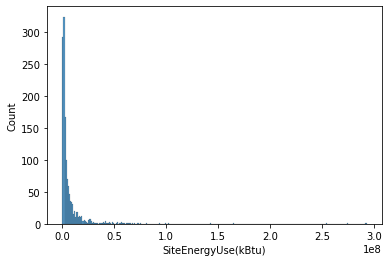

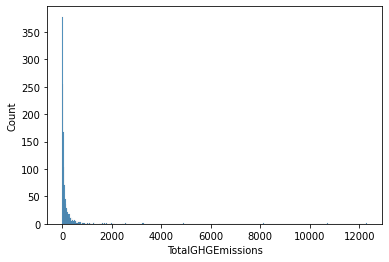

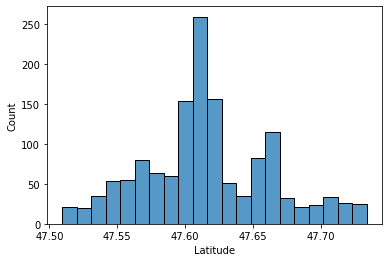

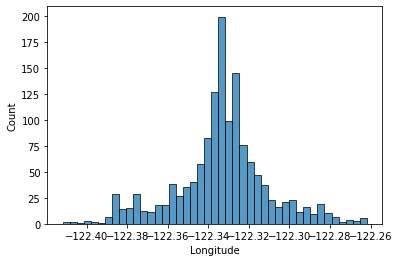

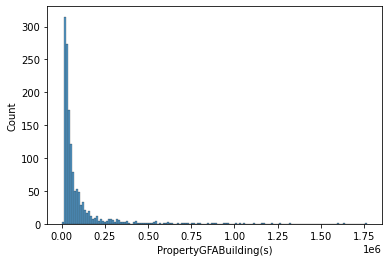

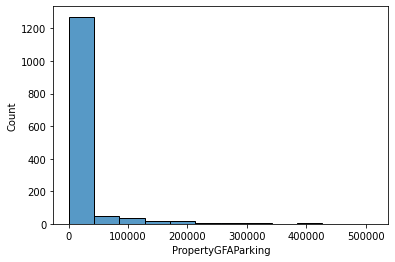

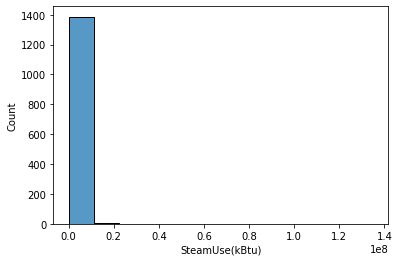

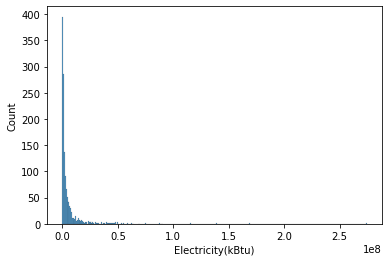

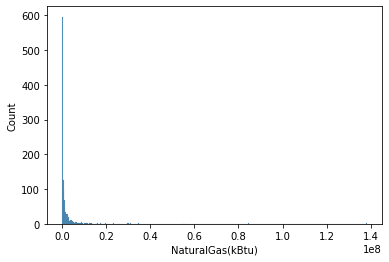

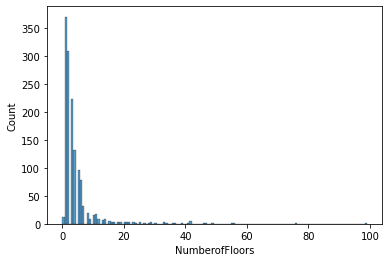

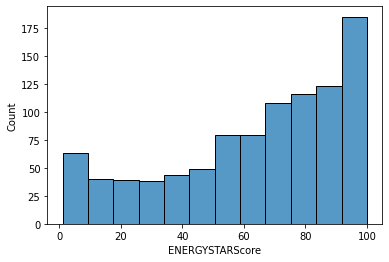

In [12]:
quantitative_columns = ['SiteEnergyUse(kBtu)','TotalGHGEmissions',
       'Latitude', 'Longitude','PropertyGFABuilding(s)','PropertyGFAParking','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','NumberofFloors','ENERGYSTARScore']


# Histograms
for i, col in enumerate(df_nonresidential[quantitative_columns]):
   plt.figure(i)
   sns.histplot(df_nonresidential[col])



### Qualitative Statistics
Years of build as well as NumberofBuildings are seen as Qualitative features

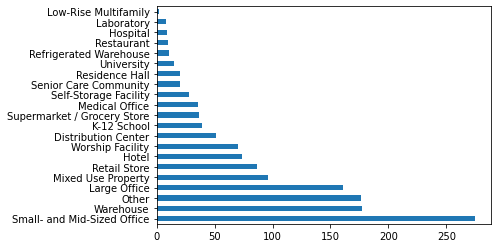

In [13]:
qualitative_columns = ['PrimaryPropertyType','YearBuilt','NumberofBuildings']
     
df_nonresidential['PrimaryPropertyType'].value_counts().plot(kind='barh')


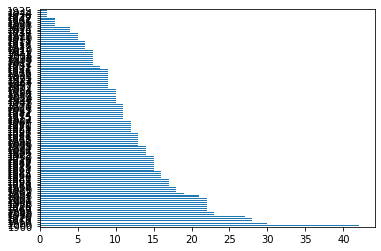

In [14]:
df_nonresidential['YearBuilt'].value_counts().plot(kind='barh')


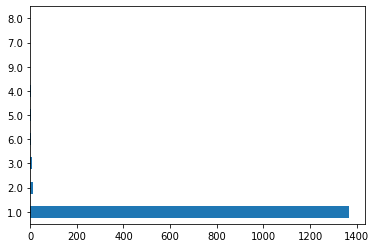

In [15]:
df_nonresidential['NumberofBuildings'].value_counts().plot(kind='barh')


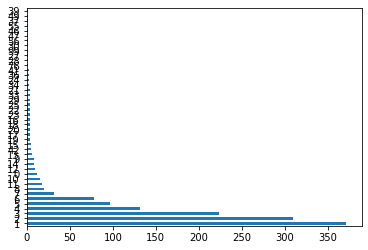

In [16]:
df_nonresidential['NumberofFloors'].value_counts().plot(kind='barh')

### New feature creation: porportion of energy used

In [17]:
df_nonresidential_proportion = df_nonresidential[['SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)']]

total_energy = df_nonresidential['SiteEnergyUse(kBtu)'].to_numpy()

for energy in df_nonresidential_proportion.columns:
  np_energy_type = df_nonresidential_proportion[energy].to_numpy()
  proportion_energy = np_energy_type/total_energy
  df_nonresidential_proportion['proportion_'+energy] = proportion_energy

df_nonresidential_proportion = df_nonresidential_proportion.drop(['SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)'], axis=1)

features_final = ['SiteEnergyUse(kBtu)','TotalGHGEmissions', 'PrimaryPropertyType',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFABuilding(s)','PropertyGFAParking','ENERGYSTARScore']

df_with_final_features = df_nonresidential[features_final].join(df_nonresidential_proportion)
df_cleaned = df_with_final_features.dropna()
print(df_cleaned.head(3))




   SiteEnergyUse(kBtu)  TotalGHGEmissions PrimaryPropertyType  Latitude  \
0            7226362.5             249.98               Hotel  47.61220   
1            8387933.0             295.86               Hotel  47.61317   
2           72587024.0            2089.28               Hotel  47.61393   

   Longitude YearBuilt  NumberofBuildings  NumberofFloors  \
0 -122.33799      1927                1.0              12   
1 -122.33393      1996                1.0              11   
2 -122.33810      1969                1.0              41   

   PropertyGFABuilding(s)  PropertyGFAParking  ENERGYSTARScore  \
0                   88434                   0             60.0   
1                   88502               15064             61.0   
2                  759392              196718             43.0   

   proportion_SteamUse(kBtu)  proportion_Electricity(kBtu)  \
0                   0.277302                      0.546060   
1                   0.000000                      0.386609   
2  

<ipython-input-17-48d362a96f88>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonresidential_proportion['proportion_'+energy] = proportion_energy


### Show and save my cleaned df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 3347
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SiteEnergyUse(kBtu)           963 non-null    float64
 1   TotalGHGEmissions             963 non-null    float64
 2   PrimaryPropertyType           963 non-null    object 
 3   Latitude                      963 non-null    float64
 4   Longitude                     963 non-null    float64
 5   YearBuilt                     963 non-null    object 
 6   NumberofBuildings             963 non-null    float64
 7   NumberofFloors                963 non-null    int64  
 8   PropertyGFABuilding(s)        963 non-null    int64  
 9   PropertyGFAParking            963 non-null    int64  
 10  ENERGYSTARScore               963 non-null    float64
 11  proportion_SteamUse(kBtu)     963 non-null    float64
 12  proportion_Electricity(kBtu)  963 non-null    float64
 13  prop

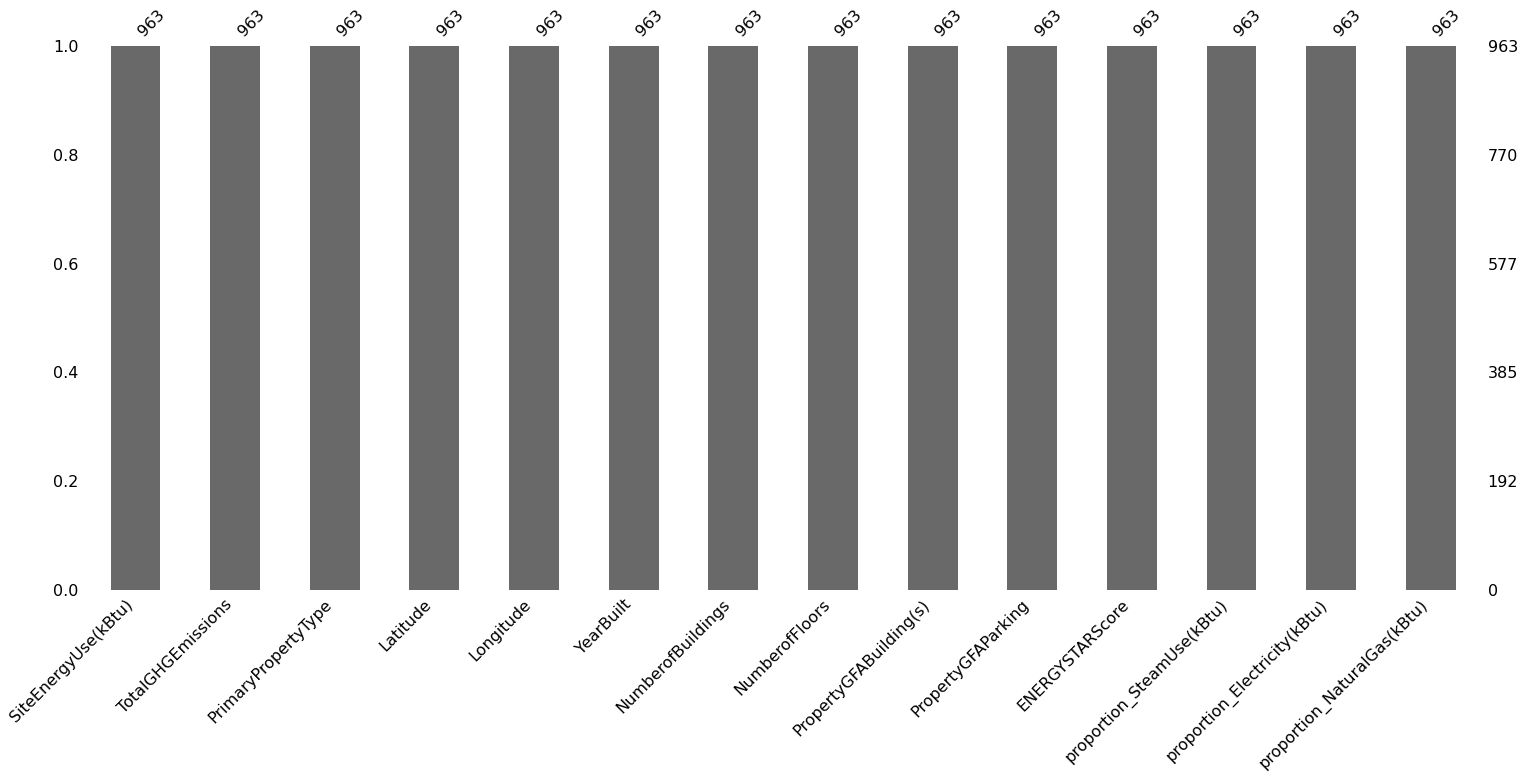

In [18]:
%matplotlib inline
msno.bar(df_cleaned)
df_cleaned.info(verbose=True)
print('shape of cleaned df',df_cleaned.shape)
df_cleaned.to_csv('df_cleaned.csv')  